In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import mlrose_hiive as mlr
from mlrose_hiive import Knapsack, DiscreteOpt, random_hill_climb
from mlrose_hiive import SARunner, GARunner, RHCRunner
from array import array
import importlib
import numpy as np
import helpers #import the module here, so that it can be reloaded.
importlib.reload(helpers)
import time
import joblib

In [2]:
N = 40
max_weight_per_item = 25
max_value_per_item = 15

weights = 1 + np.random.randint(max_weight_per_item, size=N)
values = 1 + np.random.randint(max_value_per_item, size=N)
max_weight_pct = 0.35

In [16]:
weights, values

(array([15, 24,  9,  6, 19, 21, 10,  9,  6,  5,  5, 12, 18, 25, 11,  1, 15,
        14,  4,  8,  8, 22, 20, 13,  7,  7, 24, 10,  8,  7, 11, 21, 12, 16,
        13, 24, 21,  6, 24, 25]),
 array([ 4,  1, 14,  1,  9,  7,  7, 11,  7, 11,  1,  7,  8,  5,  8,  6, 11,
         4,  8,  5, 15, 11, 15, 13,  7,  5,  5, 12,  3,  2,  4, 14,  5,  4,
         4, 13, 15,  7,  9,  5]))

In [22]:
max_iters = 5000
restarts = [25, 75, 100]
max_attempts = [25, 50, 75, 100, 125, 150]
labels = ['max_attempts', 'restarts', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in max_attempts:
    for r in restarts:
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        prob = mlr.DiscreteOpt(N, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.random_hill_climb(prob, max_attempts=a, random_state=1, max_iters=max_iters, restarts=r, curve=True)
        run_time = time.perf_counter() - start_time
        stopped_at = len(curve)
        results_list.append([a, r, run_time, best_fitness, stopped_at])
        joblib.dump(pd.DataFrame.from_records(curve), f"knapsack/rhc/max_attempts{a},restarts{r}_curve.pkl")
rhc_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(rhc_results, "knapsack/rhc/knapsack_rhc_results.pkl")

['knapsack/rhc/knapsack_rhc_results.pkl']

In [23]:
rhc_results.sort_values(by="best_fitness", ascending=False)

,max_attempts,restarts,run_time,best_fitness,stopped_at
4,50,75,0.103714,147.0,57
5,50,100,0.133150,147.0,57
0,25,25,0.032851,146.0,26
2,25,100,0.071163,146.0,26
1,25,75,0.062375,146.0,26
8,75,100,0.210928,144.0,115
11,100,100,0.260155,143.0,149
7,75,75,0.143634,143.0,102
10,100,75,0.208105,143.0,149
14,125,100,0.331107,141.0,159


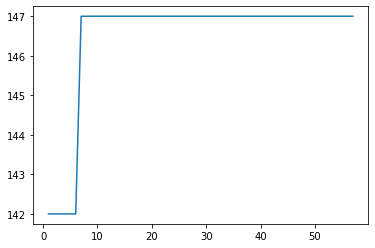

In [24]:
rhc_curve = joblib.load("knapsack/rhc/max_attempts50,restarts75_curve.pkl")
rhc_best_vals = rhc_curve[0].values
plt.plot(range(1, len(rhc_best_vals) + 1), rhc_best_vals)

In [25]:
temps = [1, 5, 10, 50, 100]
max_attempts = [25, 50, 75, 100, 125, 150]
labels = ['max_attempts', 'temp', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in max_attempts:
    for temp in temps:
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        prob = mlr.DiscreteOpt(N, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.simulated_annealing(prob, max_attempts=a, max_iters=max_iters, random_state=1, schedule=mlr.GeomDecay(init_temp=temp), curve=True)
        run_time = time.perf_counter() - start_time
        stopped_at = len(curve)
        results_list.append([a, temp, run_time, best_fitness, stopped_at])
        joblib.dump(pd.DataFrame.from_records(curve), f"knapsack/sa/max_attempts{a},temp{temp}_curve.pkl")
sa_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(sa_results, "knapsack/sa/knapsack_sa_results.pkl")

['knapsack/sa/knapsack_sa_results.pkl']

In [26]:
sa_results.sort_values(by="best_fitness", ascending=False)

,max_attempts,temp,run_time,best_fitness,stopped_at
29,150,100,0.023077,156.0,587
9,50,100,0.018924,156.0,487
19,100,100,0.022709,156.0,537
14,75,100,0.020461,156.0,512
24,125,100,0.021506,156.0,562
4,25,100,0.018182,140.0,307
28,150,50,0.023217,137.0,523
13,75,50,0.016803,137.0,448
23,125,50,0.023485,137.0,498
8,50,50,0.015550,137.0,423


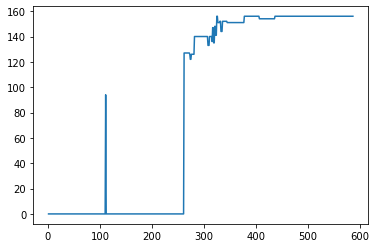

In [27]:
sa_curve = joblib.load("knapsack/sa/max_attempts150,temp100_curve.pkl")
sa_best_vals = sa_curve[0].values
plt.plot(range(1, len(sa_best_vals) + 1), sa_best_vals)

In [61]:
populations = [100, 200, 300, 400]
mutation_probs = [0.1, 0.2, 0.3]
labels = ['max_attempts', 'population_size', 'mutation_probability', 'run_time', 'best_fitness', 'stopped_at']
results_list = []
for pop in populations:
    for prob in mutation_probs:
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        problem = mlr.DiscreteOpt(N, eval_func)
        start_time = time.perf_counter()
        (best_state, best_fitness, curve) = mlr.genetic_alg(
            problem,
            pop_size=pop,
            mutation_prob = prob,
            max_iters=max_iters,
            curve=True,
            random_state=1
        )
        run_time = time.perf_counter() - start_time
        stopped_at = len(curve)
        results_list.append((
            a,
            pop, 
            prob, 
            run_time, 
            best_fitness,
            stopped_at,
        ))
        joblib.dump(pd.DataFrame.from_records(curve), f"knapsack/ga/max_attempts{a},pop{pop},mut{prob}_curve.pkl")
ga_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(ga_results, "knapsack/ga/knapsack_ga_results.pkl")

['knapsack/ga/knapsack_ga_results.pkl']

In [62]:
ga_results

,max_attempts,population_size,mutation_probability,run_time,best_fitness,stopped_at
0,50,100,0.1,0.372830,184.0,48
1,50,100,0.2,0.354842,184.0,46
2,50,100,0.3,0.412587,186.0,53
3,50,200,0.1,0.541197,186.0,35
4,50,200,0.2,0.660105,183.0,42
5,50,200,0.3,0.731273,188.0,46
6,50,300,0.1,1.073931,186.0,46
7,50,300,0.2,1.311732,188.0,56
8,50,300,0.3,1.028688,187.0,43
9,50,400,0.1,1.446830,188.0,46


In [63]:
ga_results.loc[ga_results['mutation_probability'].isin(mutation_probs)].sort_values(by="best_fitness", ascending=False)
# mutation_probs

,max_attempts,population_size,mutation_probability,run_time,best_fitness,stopped_at
5,50,200,0.3,0.731273,188.0,46
7,50,300,0.2,1.311732,188.0,56
9,50,400,0.1,1.446830,188.0,46
10,50,400,0.2,1.574648,188.0,48
11,50,400,0.3,1.311019,188.0,41
8,50,300,0.3,1.028688,187.0,43
2,50,100,0.3,0.412587,186.0,53
3,50,200,0.1,0.541197,186.0,35
6,50,300,0.1,1.073931,186.0,46
0,50,100,0.1,0.372830,184.0,48


In [64]:
ga_curve = joblib.load("knapsack/ga/max_attempts150,pop400,mut0.3_curve.pkl")
ga_best_fn_evals = ga_curve[1].values

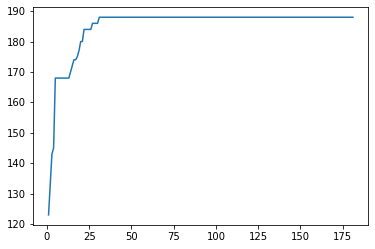

In [65]:
ga_curve = joblib.load("knapsack/ga/max_attempts150,pop400,mut0.3_curve.pkl")
ga_best_vals = ga_curve[0].values
plt.plot(range(1, len(ga_best_vals) + 1), ga_best_vals)

In [66]:
pcts = [0.1, 0.2, 0.4, 0.6, 0.8]
pops = [100, 200, 300, 400]
labels = ['keep_pct', 'population_size', 'run_time', 'best_fitness', 'stopped_at']
results_list = []
for pct in pcts:
    for pop in pops:
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        prob = mlr.DiscreteOpt(N, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.mimic(
            prob,
            pop_size=pop,
            keep_pct=pct,
            max_iters=np.inf, 
            random_state=1, 
            curve=True,
            )
        run_time = time.perf_counter() - start_time
        stopped_at = len(curve)
        results_list.append([pct, pop, run_time, best_fitness, stopped_at])
        joblib.dump(pd.DataFrame.from_records(curve), f"knapsack/mimic/pct{pct},pop{pop}_curve.pkl")
mimic_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(mimic_results, "knapsack/mimic/knapsack_mimic_results.pkl")

['knapsack/mimic/knapsack_mimic_results.pkl']

In [67]:
mimic_results

,keep_pct,population_size,run_time,best_fitness,stopped_at
0,0.1,100,13.243861,156.0,19
1,0.1,200,9.915116,148.0,14
2,0.1,300,7.764581,146.0,11
3,0.1,400,10.983612,149.0,15
4,0.2,100,12.946585,156.0,19
5,0.2,200,9.812740,148.0,14
6,0.2,300,7.902617,146.0,11
7,0.2,400,11.051238,149.0,15
8,0.4,100,12.825719,156.0,19
9,0.4,200,9.689791,148.0,14


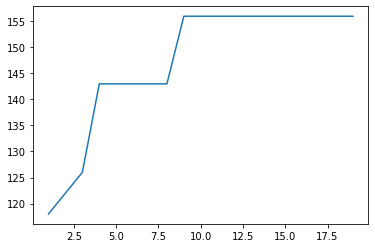

In [69]:
mimic_curve = joblib.load("knapsack/mimic/pct0.1,pop100_curve.pkl")
mimic_best_vals = mimic_curve[0].values
plt.plot(range(1, len(mimic_best_vals) + 1), mimic_best_vals)

Text(0.5, 1.0, 'Fitness over Iterations, N=40')

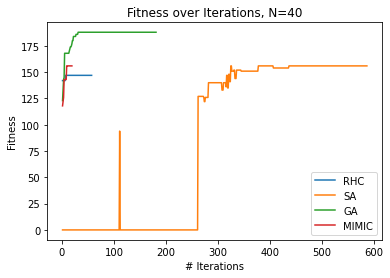

In [97]:
plt.plot(range(1, len(rhc_best_vals) + 1), rhc_best_vals, label="RHC")
plt.plot(range(1, len(sa_best_vals) + 1), sa_best_vals, label="SA")
plt.plot(range(1, len(ga_best_vals) + 1), ga_best_vals, label="GA")
plt.plot(range(1, len(mimic_best_vals) + 1), mimic_best_vals, label="MIMIC")
plt.legend(loc="best")
plt.xlabel("# Iterations")
plt.ylabel("Fitness")
plt.title("Fitness over Iterations, N=40")

Text(0.5, 1.0, 'Fn Evals over Iterations')

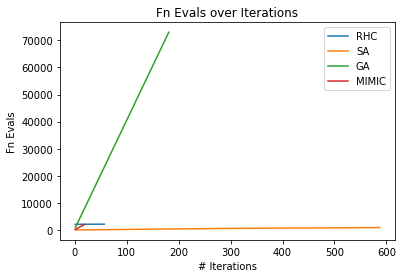

In [73]:
plt.plot(range(1, len(rhc_best_vals) + 1), rhc_curve[1].values, label="RHC")
plt.plot(range(1, len(sa_best_vals) + 1), sa_curve[1].values, label="SA")
plt.plot(range(1, len(ga_best_vals) + 1), ga_curve[1].values, label="GA")
plt.plot(range(1, len(mimic_best_vals) + 1), mimic_curve[1].values, label="MIMIC")
plt.legend(loc="best")
plt.xlabel("# Iterations")
plt.ylabel("Fn Evals")
plt.title("Fn Evals over Iterations")

In [80]:
Ns = [10, 15, 20, 25, 50, 100, 150, 200]
all_weights = []
all_vals = []
max_weight_per_item = 25
max_value_per_item = 15
for n in Ns:
    weights = 1 + np.random.randint(max_weight_per_item, size=n)
    values = 1 + np.random.randint(max_value_per_item, size=n)
    all_weights.append(weights)
    all_vals.append(values)

[array([10, 22, 21, 21,  1, 11, 23,  1, 10, 16]),
 array([20, 19, 17, 21,  3, 18, 25,  1,  6, 15, 17,  8,  7,  3, 17]),
 array([ 6,  5,  8,  8, 24,  5, 21,  6,  9, 17, 22, 10, 18, 19,  4, 20, 12,
        20,  6,  1]),
 array([12, 10,  5,  6,  7,  3, 18,  3,  2,  6, 25, 21,  6, 12, 22, 12, 19,
         3, 14, 14, 24, 13, 21,  2, 13]),
 array([ 1,  1, 12,  2, 24, 19,  4,  1, 24,  1,  3, 19, 21,  5,  9,  3, 22,
         5, 23, 22, 20,  7, 15, 18, 25,  5,  1,  1, 10, 14, 10, 14,  7,  9,
        10, 10, 19, 13, 14, 15,  8,  1, 13, 12, 14, 17,  3, 14, 14, 15]),
 array([14, 20, 23, 25,  2,  1,  3, 24,  2, 20, 20,  2, 22, 19, 13, 21,  8,
        14,  5,  5, 15, 11,  1, 24,  2, 10, 10,  8, 18, 23,  1, 11,  5,  6,
         7, 11, 24, 24, 24, 10, 19, 12,  3, 15, 24, 19, 24,  1, 23,  6, 15,
         2, 19, 13,  4,  9, 12,  9, 19,  2,  4,  1,  5, 12, 18,  7, 14,  1,
        18,  8, 14,  6, 19, 25, 21,  2, 11,  5,  6, 21, 23, 13, 14, 13, 14,
         6,  3, 25,  3, 22, 12, 23,  4,  1, 14, 21, 16, 21

In [81]:
Ns = [10, 15, 20, 25, 50, 100, 150, 200]
rhc_run_times = []
rhc_best_fitnesses = []
rhc_fitness_per_iteration = []
rhc_fn_evals_per_iteration = []
for i in range(len(Ns)):
    n = Ns[i]
    weights=all_weights[i]
    values=all_vals[i]
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        prob = mlr.DiscreteOpt(n, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.random_hill_climb(prob, max_attempts=50, restarts=75, random_state=np.random.seed(), max_iters=1000, curve=True)
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    rhc_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    rhc_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    rhc_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    rhc_run_times.append(avg_run_time)

In [82]:
rhc_best_fitnesses

[53.2, 75.6, 85.8, 112.4, 214.2, 205.4, 0.0, 0.0]

In [83]:
Ns = [10, 15, 20, 25, 50, 100, 150, 200]
sa_run_times = []
sa_best_fitnesses = []
sa_fitness_per_iteration = []
sa_fn_evals_per_iteration = []
for i in range(len(Ns)):
    n = Ns[i]
    weights=all_weights[i]
    values=all_vals[i]
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        prob = mlr.DiscreteOpt(n, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.simulated_annealing(prob, max_attempts=150, schedule=mlr.GeomDecay(init_temp=100), max_iters=1000, curve=True)
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    sa_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    sa_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    sa_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    sa_run_times.append(avg_run_time)

In [84]:
sa_best_fitnesses

[47.8, 71.8, 89.4, 116.0, 244.2, 76.2, 0.0, 0.0]

In [89]:
Ns = [10, 15, 20, 25, 50, 100, 150, 200]
ga_run_times = []
ga_best_fitnesses = []
ga_fitness_per_iteration = []
ga_fn_evals_per_iteration = []
for i in range(len(Ns)):
    n = Ns[i]
    weights=all_weights[i]
    values=all_vals[i]
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        prob = mlr.DiscreteOpt(n, eval_func)
        start_time = time.perf_counter()
        (best_state, best_fitness, curve) = mlr.genetic_alg(
            prob,
            pop_size=200,
            mutation_prob = 0.3,
            max_iters=1000,
            max_attempts=50,
            curve=True,
        )
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    ga_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    ga_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    ga_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    ga_run_times.append(avg_run_time)

In [90]:
ga_best_fitnesses

[56.0, 79.0, 101.0, 124.0, 278.0, 517.4, 653.4, 207.8]

In [91]:
Ns = [10, 15, 20, 25, 50, 100, 150, 200]
mimic_run_times = []
mimic_best_fitnesses = []
mimic_fitness_per_iteration = []
mimic_fn_evals_per_iteration = []
for i in range(len(Ns)):
    n = Ns[i]
    weights=all_weights[i]
    values=all_vals[i]
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
        prob = mlr.DiscreteOpt(n, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.mimic(
            prob,
            pop_size=100,
            keep_pct=0.1,
            max_iters=1000,
            curve=True,
        )
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
    
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    mimic_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    mimic_fitness_per_iteration.append(c_avgs)

    avg_fitness = np.mean(best_fitnesses)
    mimic_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    mimic_run_times.append(avg_run_time)

In [92]:
mimic_best_fitnesses

[52.8, 67.4, 88.6, 110.0, 198.8, 312.0, 0.0, 126.6]

In [5]:
len(mimic_fitness_per_iteration)

NameError: name 'mimic_fitness_per_iteration' is not defined

Text(0.5, 1.0, 'Best Fitness over N')

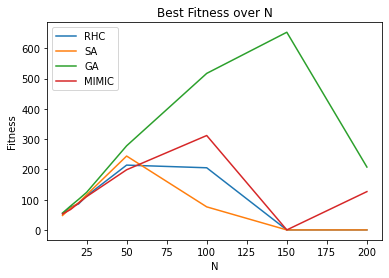

In [96]:
plt.plot(Ns, rhc_best_fitnesses, label="RHC")
plt.plot(Ns, sa_best_fitnesses, label="SA")
plt.plot(Ns, ga_best_fitnesses, label="GA")
plt.plot(Ns, mimic_best_fitnesses, label="MIMIC")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.legend(loc="best")
plt.xlabel("N")
plt.ylabel("Fitness")
plt.title("Best Fitness over N")

Text(0.5, 1.0, 'Run Time over N')

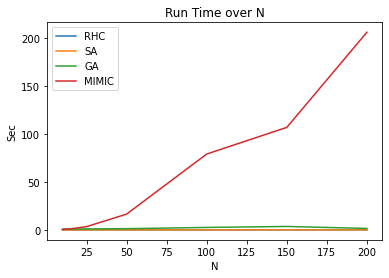

In [95]:
plt.plot(Ns, rhc_run_times, label="RHC")
plt.plot(Ns, sa_run_times, label="SA")
plt.plot(Ns, ga_run_times, label="GA")
plt.plot(Ns, mimic_run_times, label="MIMIC")
plt.ylabel("Sec")
plt.xlabel("N")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.title("Run Time over N")

In [4]:
eval_func = Knapsack(weights, values, max_weight_pct=max_weight_pct)
prob = mlr.DiscreteOpt(N, eval_func)
rhc = RHCRunner(problem=prob,
                experiment_name="rhc",
                output_directory="knapsack/rhc_runner",
                seed=12345,
                iteration_list=2 ** np.arange(10),
                max_attempts=500,
                restart_list=[25, 75, 100])
rhc.run()

(      Iteration  Fitness  FEvals         Time  \
 0             0      0.0       0     0.000232   
 1             1      0.0       1     0.011863   
 2             2      0.0       2     0.020529   
 3             4      0.0       4     0.027937   
 4             8      0.0       8     0.037832   
 ...         ...      ...     ...          ...   
 2228         32      0.0   50190  2116.685210   
 2229         64      0.0   50222  2119.948663   
 2230        128      0.0   50286  2125.371057   
 2231        256      0.0   50414  2135.067638   
 2232        512      0.0   50658  2153.050518   
 
                                                   State  Restarts  max_iters  \
 0     [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, ...        25        512   
 1     [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, ...        25        512   
 2     [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, ...        25        512   
 3     [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, ...        25        